In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Data Ingestion

In [3]:
df=pd.read_csv('.\dsbdalabdataset\Social_Network_Ads.csv')

In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
### Data Validations

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.shape

(400, 5)

In [9]:
df.duplicated().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Gender']=enc.fit_transform(df['Gender'])

In [11]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [12]:
### Bivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

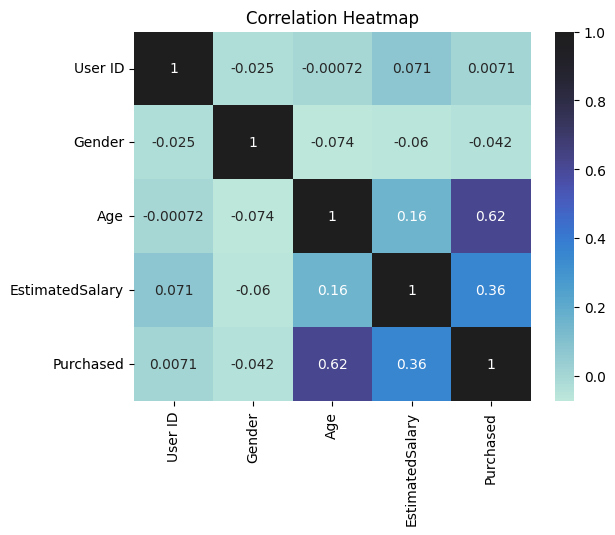

In [13]:
sns.heatmap(df.corr(),annot=True,center=1)
plt.title("Correlation Heatmap")

In [14]:
### Droping the User ID as it is not so co-related with Purchased Feature
df.drop(['User ID','Gender'],inplace=True,axis=1)

In [15]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [17]:
X=df.drop(['Purchased'],axis=1)
Y=df['Purchased']

In [18]:
### Model Training

In [19]:
from  sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()

In [22]:
%%time
lr.fit(X_train,Y_train)

CPU times: total: 0 ns
Wall time: 27 ms


LogisticRegression()

In [23]:
Y_pred=lr.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(Y_test,Y_pred)


0.9125

In [25]:
### Standardizing the Data

In [26]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_s=std.fit_transform(X_train)
X_test_s=std.transform(X_test)

In [27]:
### Retraining the model

In [28]:
lr.fit(X_train_s,Y_train)

LogisticRegression()

In [29]:
%%time
y_pred=lr.predict(X_test_s)

CPU times: total: 0 ns
Wall time: 0 ns


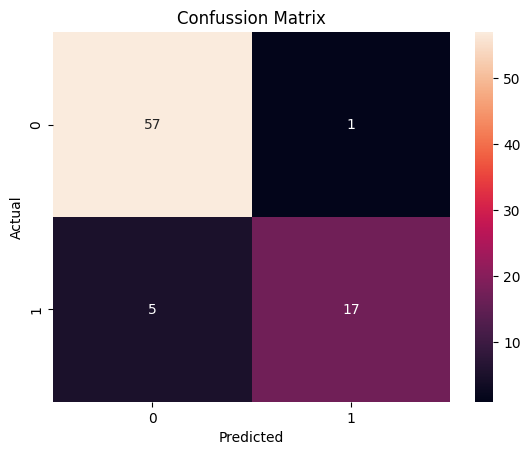

In [30]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True);
plt.title("Confussion Matrix");
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [31]:
f" Accuracy of Model: {accuracy_score(Y_test,y_pred)}"

' Accuracy of Model: 0.925'

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

